In [1]:
from playsound import playsound
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features
import os
from PIL import Image

In [2]:
dataset_path = r'C:\Users\alanj\Documents\TuLeHi\Voice_Data'
for name in listdir(dataset_path):
    if isdir(join(dataset_path, name)):
        print(name)

eight
five
nine
no
off
on
one
right
seven
sheila
six
stop
three
tree
two
up
visual
wow
yes
zero
_background_noise_


In [3]:
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['eight', 'five', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '_background_noise_']


In [4]:
all_targets.remove('_background_noise_')
print(all_targets)

['eight', 'five', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']


In [5]:
num_samples = 0
for target in all_targets:
    print(len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

48
100
13
31
85
133
32
58
78
40
145
3872
94
43
266
259
69
117
177
319
Total samples: 5979


In [6]:
target_list = all_targets
feature_sets_file = r'C:\Users\alanj\Documents\TuLeHi\Voice_Data\all_targets_mfcc_sets.npz'
perc_keep_samples = 1.0 # 1.0 is keep all samples
val_ratio = 0.1
test_ratio = 0.1
sample_rate = 8000
num_mfcc = 16
len_mfcc = 16

In [7]:
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)

C:\Users\alanj\Documents\TuLeHi\Voice_Data\eight
C:\Users\alanj\Documents\TuLeHi\Voice_Data\five
C:\Users\alanj\Documents\TuLeHi\Voice_Data\nine
C:\Users\alanj\Documents\TuLeHi\Voice_Data\no
C:\Users\alanj\Documents\TuLeHi\Voice_Data\off
C:\Users\alanj\Documents\TuLeHi\Voice_Data\on
C:\Users\alanj\Documents\TuLeHi\Voice_Data\one
C:\Users\alanj\Documents\TuLeHi\Voice_Data\right
C:\Users\alanj\Documents\TuLeHi\Voice_Data\seven
C:\Users\alanj\Documents\TuLeHi\Voice_Data\sheila
C:\Users\alanj\Documents\TuLeHi\Voice_Data\six
C:\Users\alanj\Documents\TuLeHi\Voice_Data\stop
C:\Users\alanj\Documents\TuLeHi\Voice_Data\three
C:\Users\alanj\Documents\TuLeHi\Voice_Data\tree
C:\Users\alanj\Documents\TuLeHi\Voice_Data\two
C:\Users\alanj\Documents\TuLeHi\Voice_Data\up
C:\Users\alanj\Documents\TuLeHi\Voice_Data\visual
C:\Users\alanj\Documents\TuLeHi\Voice_Data\wow
C:\Users\alanj\Documents\TuLeHi\Voice_Data\yes
C:\Users\alanj\Documents\TuLeHi\Voice_Data\zero


In [8]:
print(y)
for item in y:
    print(len(item))

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]), array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]), array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4

69
117
177
319


In [9]:
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [10]:
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

In [11]:
print(len(filenames))
filenames = filenames[:int(len(filenames) * perc_keep_samples)]
print(len(filenames))

5979
5979


In [12]:
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)

In [13]:
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]

In [14]:
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size + test_set_size)]
y_orig_train = y[(val_set_size + test_set_size):]

In [15]:
def calc_mfcc(path):
    
    signal, fs = librosa.load(path, sr=sample_rate)
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=0.256,
                                            winstep=0.050,
                                            numcep=num_mfcc,
                                            nfilt=26,
                                            nfft=2048,
                                            preemph=0.0,
                                            ceplifter=0,
                                            appendEnergy=False,
                                            winfunc=np.hanning)
    return mfccs.transpose()

In [16]:
prob_cnt = 0
x_test = []
y_test = []
for index, filename in enumerate(filenames_train):
    
    # Stop after 500
    if index >= 500:
        break
    
    # Create path from given filename and target item
    path = join(dataset_path, target_list[int(y_orig_train[index])], 
                filename)
    
    # Create MFCCs
    mfccs = calc_mfcc(path)
    
    if mfccs.shape[1] == len_mfcc:
        x_test.append(mfccs)
        y_test.append(y_orig_train[index])
    else:
        print('Dropped:', index, mfccs.shape)
        prob_cnt += 1

Dropped: 6 (16, 11)
Dropped: 20 (16, 15)
Dropped: 47 (16, 9)
Dropped: 55 (16, 8)
Dropped: 57 (16, 9)
Dropped: 80 (16, 7)
Dropped: 88 (16, 15)
Dropped: 94 (16, 12)
Dropped: 116 (16, 14)
Dropped: 134 (16, 13)
Dropped: 137 (16, 13)
Dropped: 146 (16, 12)
Dropped: 154 (16, 14)
Dropped: 168 (16, 15)
Dropped: 185 (16, 12)
Dropped: 200 (16, 11)
Dropped: 203 (16, 11)
Dropped: 222 (16, 10)
Dropped: 264 (16, 15)
Dropped: 324 (16, 10)
Dropped: 329 (16, 12)
Dropped: 345 (16, 12)
Dropped: 362 (16, 13)
Dropped: 363 (16, 15)
Dropped: 364 (16, 15)
Dropped: 376 (16, 15)
Dropped: 382 (16, 11)
Dropped: 384 (16, 15)
Dropped: 423 (16, 8)
Dropped: 479 (16, 11)
Dropped: 481 (16, 12)
Dropped: 498 (16, 13)


2
3
4
5
7
9
12
15
17
19
21
22
23
25
27
28
29
31
32
34
35
36
37
38
39
40
41
42
44
45
46
47
48
49
50
51
52
53
54
55
58
59
61
62
63
64
66
69
70
72
75
76
78
79
80
81
83
85
86
89
92
93
95
98
99
MFCCs: [[-4.84213067e+01 -4.92466956e+01 -5.13276625e+01 -5.36581665e+01
  -5.02836847e+01 -4.23462160e+01 -3.19917057e+01 -2.45745053e+01
  -2.12713031e+01 -2.10464766e+01 -2.43161724e+01 -3.15800451e+01
  -3.89688315e+01 -3.75578495e+01 -3.43561216e+01 -3.50212007e+01]
 [-3.46405689e+00 -3.19107624e+00 -2.23545354e+00  8.26656962e-01
   8.66362966e+00  1.28776374e+01  1.24766220e+01  8.71194125e+00
   5.77470443e+00  3.93152729e+00  2.60972227e+00  2.20372476e+00
   1.64127790e+00 -1.80310548e+00 -1.14038234e+00 -2.20279099e-01]
 [ 3.14054417e-01 -3.30431096e-01 -1.08908625e+00 -5.94595815e-01
   1.13485585e+00 -2.36428679e+00 -7.65534018e+00 -8.75737379e+00
  -7.65224850e+00 -5.03492057e+00 -1.90218663e+00  2.26279657e+00
   4.26079117e+00  1.63419528e+00  2.52930376e+00  3.42540812e+00]
 [ 2.8240

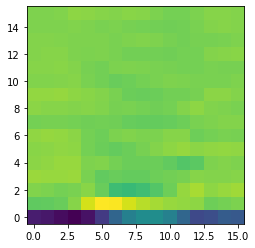

In [18]:
idx = 71
for i in range(100):
    if target_list[int(y_orig_train[i])] == 'stop':
        print (i)
        
# Create path from given filename and target item
path = join(dataset_path, target_list[int(y_orig_train[idx])], 
            filenames_train[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

# TEST: Play problem sounds
print(target_list[int(y_orig_train[idx])])
playsound(path)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='viridis', origin='lower')

In [19]:
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue

        # Create MFCCs
        mfccs = calc_mfcc(path)

        # Only keep MFCCs with given length
        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [20]:
x_train, y_train, prob = extract_features(filenames_train, 
                                          y_orig_train)
print('Removed percentage:', prob / len(y_orig_train))
x_val, y_val, prob = extract_features(filenames_val, y_orig_val)
print('Removed percentage:', prob / len(y_orig_val))
x_test, y_test, prob = extract_features(filenames_test, y_orig_test)
print('Removed percentage:', prob / len(y_orig_test))

Dropped: 23 (16, 15)
Dropped: 58 (16, 11)
Dropped: 75 (16, 13)
Dropped: 77 (16, 14)
Dropped: 94 (16, 7)
Dropped: 126 (16, 15)
Dropped: 130 (16, 12)
Dropped: 146 (16, 12)
Dropped: 162 (16, 12)
Dropped: 178 (16, 13)
Dropped: 205 (16, 12)
Dropped: 237 (16, 13)
Dropped: 250 (16, 14)
Dropped: 273 (16, 15)
Dropped: 278 (16, 9)
Dropped: 284 (16, 11)
Dropped: 301 (16, 13)
Dropped: 372 (16, 11)
Dropped: 380 (16, 9)
Dropped: 385 (16, 9)
Dropped: 393 (16, 13)
Dropped: 399 (16, 14)
Dropped: 408 (16, 12)
Dropped: 412 (16, 7)
Dropped: 437 (16, 11)
Dropped: 445 (16, 9)
Dropped: 452 (16, 15)
Dropped: 456 (16, 11)
Dropped: 457 (16, 14)
Dropped: 460 (16, 13)
Dropped: 469 (16, 14)
Dropped: 482 (16, 5)
Dropped: 489 (16, 13)
Dropped: 550 (16, 13)
Dropped: 554 (16, 15)
Dropped: 561 (16, 15)
Dropped: 571 (16, 8)
Dropped: 580 (16, 12)
Dropped: 600 (16, 15)
Dropped: 635 (16, 15)
Dropped: 653 (16, 12)
Dropped: 672 (16, 14)
Dropped: 689 (16, 11)
Dropped: 692 (16, 12)
Dropped: 761 (16, 14)
Dropped: 764 (16, 11)
D

Dropped: 38 (16, 14)
Dropped: 90 (16, 11)
Dropped: 95 (16, 13)
Dropped: 121 (16, 11)
Dropped: 127 (16, 15)
Dropped: 128 (16, 9)
Dropped: 154 (16, 5)
Dropped: 168 (16, 13)
Dropped: 175 (16, 7)
Dropped: 202 (16, 11)
Dropped: 215 (16, 11)
Dropped: 241 (16, 11)
Dropped: 245 (16, 14)
Dropped: 274 (16, 12)
Dropped: 295 (16, 11)
Dropped: 311 (16, 14)
Dropped: 331 (16, 14)
Dropped: 340 (16, 13)
Dropped: 382 (16, 7)
Dropped: 387 (16, 12)
Dropped: 395 (16, 14)
Dropped: 401 (16, 15)
Dropped: 416 (16, 13)
Dropped: 424 (16, 15)
Dropped: 464 (16, 12)
Dropped: 466 (16, 15)
Dropped: 531 (16, 11)
Dropped: 575 (16, 12)
Dropped: 589 (16, 10)
Dropped: 590 (16, 9)
Removed percentage: 0.06030150753768844


In [21]:
np.savez(feature_sets_file, 
         x_train=x_train, 
         y_train=y_train, 
         x_val=x_val, 
         y_val=y_val, 
         x_test=x_test, 
         y_test=y_test)

In [22]:
mfccs = calc_mfcc(r'C:\Users\alanj\Documents\TuLeHi\stop.wav')
img = Image.fromarray(mfccs, "RGB")
img.save(r'C:\Users\alanj\Documents\TuLeHi\stop.jpg')

In [23]:
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

In [24]:
len(feature_sets['x_train'])


4476

In [25]:
print(feature_sets['y_val'])

[17. 11. 11. 11. 12. 11. 19. 11. 11. 11. 14. 11. 11. 11. 11. 11. 11. 11.
  0.  7.  2.  4. 11. 11. 11. 11. 11. 11.  1. 15. 11. 11. 11. 19. 11. 19.
 11. 11.  1. 11. 14. 11. 11.  0. 11. 11. 11. 11. 14. 14. 19. 11. 11. 11.
 11. 18.  5.  3. 11. 11. 11. 11. 11. 15. 11. 11. 19. 11. 11. 11. 11. 11.
 11. 12. 14.  4. 11. 11. 11. 11. 11. 11. 15. 19.  1. 19. 11. 11. 14. 18.
 11. 11.  4. 11. 14. 11. 11. 11. 14.  0. 11. 11. 18. 18. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 15. 11.  4. 11. 11. 15. 11. 11.  0. 11. 10.
 11. 16. 11. 11. 11. 10. 11. 11. 11. 11. 11. 19.  5. 19. 11. 11. 11. 14.
 11. 11. 11. 15. 11. 17.  5. 11. 11. 15. 11. 11. 13.  5. 11. 11. 11. 11.
 19. 11. 19. 11. 11.  7. 11. 19. 14. 11. 11. 14.  5. 19. 11. 11. 11. 11.
 11. 11. 14. 16. 11. 18. 14. 11. 11. 18.  8. 18. 11.  1. 11. 15. 11. 11.
 11. 11. 14. 11. 11. 17. 11. 11. 11. 15. 11. 11. 15. 11. 19. 19. 11. 15.
 19. 11. 19. 11. 11. 11. 11. 11.  4. 11. 15. 11. 19. 11. 11. 14. 11. 14.
 11. 14. 11. 11. 11. 11. 11. 11. 11. 11. 11.  8. 11

In [26]:
print (os.path.abspath(feature_sets_file))

C:\Users\alanj\Documents\TuLeHi\Voice_Data\all_targets_mfcc_sets.npz
